# Data EDA 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from IPython.core import display as ICD
import pandas as pd
import glob, os
import seaborn as sns
from sklearn import svm
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt


In [0]:
multisite_df = pd.read_csv('drive/My Drive/Projects/pilot_mouse_connectivity/cocaine_two_mice/Spectrogram_data/updated_data/multisite_averaged_data.csv')

In [70]:
multisite_df.drop("Unnamed: 0", axis=1,inplace=True)
multisite_df.tail()

,PFC gamma,VTA gamma,BLA gamma,NAc gamma,PFC beta,VTA beta,BLA beta,NAc beta,PFC theta,VTA theta,BLA theta,NAc theta,reference wires,mouse id,Time (s),Speed (cm/s),cocaine status,recording
14395,-57.945512,-60.610124,-54.832686,-54.930917,-53.453498,-54.694912,-48.215670,-54.100591,-45.402066,-43.293175,-41.552947,-44.923270,NaN,1,1795,1.145819,pre,2
14396,-57.283914,-61.857844,-53.046077,-56.369021,-53.506348,-52.885991,-44.472734,-46.909043,-36.616661,-43.950709,-33.409286,-38.811592,NaN,1,1796,0.167269,pre,2
14397,-57.621165,-62.037227,-54.470172,-56.285570,-50.645157,-48.306280,-46.802928,-46.783425,-46.357364,-41.330419,-36.800070,-37.888468,NaN,1,1797,0.155295,pre,2
14398,-59.532244,-61.890011,-54.634515,-54.805142,-51.794797,-54.021217,-47.390373,-51.180051,-48.041564,-42.124833,-35.664824,-40.147725,NaN,1,1798,0.004777,pre,2
14399,-58.429392,-62.086589,-54.455730,-56.122061,-47.567010,-49.108323,-46.107437,-52.037337,-41.694312,-42.653839,-33.130993,-40.041810,NaN,1,1799,0.000000,pre,2


In [0]:
multisite_df.fillna(multisite_df.mean(), inplace=True)

In [0]:
scaler = MinMaxScaler()
multisite_df[['PFC gamma', 'VTA gamma', 'BLA gamma', 'NAc gamma',
       'PFC beta', 'VTA beta', 'BLA beta', 'NAc beta', 'PFC theta',
       'VTA theta', 'BLA theta', 'NAc theta', 'reference wires']] = scaler.fit_transform(multisite_df[['PFC gamma', 'VTA gamma', 'BLA gamma', 'NAc gamma',
                                                                                                       'PFC beta', 'VTA beta', 'BLA beta', 'NAc beta', 'PFC theta',
                                                                                                       'VTA theta', 'BLA theta', 'NAc theta', 'reference wires']])

In [77]:
multisite_df.tail()

,PFC gamma,VTA gamma,BLA gamma,NAc gamma,PFC beta,VTA beta,BLA beta,NAc beta,PFC theta,VTA theta,BLA theta,NAc theta,reference wires,mouse id,Time (s),Speed (cm/s),cocaine status,recording
14395,0.160803,0.098663,0.379112,0.435232,0.116256,0.096596,0.365786,0.217770,0.279710,0.291921,0.411115,0.285573,0.274108,1,1795,1.145819,pre,2
14396,0.181986,0.068729,0.430632,0.385932,0.114759,0.148119,0.458901,0.440185,0.478738,0.274591,0.601804,0.449501,0.274108,1,1796,0.167269,pre,2
14397,0.171188,0.064426,0.389566,0.388793,0.195808,0.278560,0.400931,0.444070,0.258068,0.343653,0.522407,0.474261,0.274108,1,1797,0.155295,pre,2
14398,0.109998,0.067958,0.384827,0.439544,0.163242,0.115785,0.386317,0.308095,0.219913,0.322715,0.548989,0.413663,0.274108,1,1798,0.004777,pre,2
14399,0.145310,0.063242,0.389982,0.394398,0.283002,0.255716,0.418233,0.281581,0.363707,0.308772,0.608321,0.416504,0.274108,1,1799,0.000000,pre,2


In [30]:
multisite_df.columns.values

array(['PFC gamma', 'VTA gamma', 'BLA gamma', 'NAc gamma', 'PFC beta',
       'VTA beta', 'BLA beta', 'NAc beta', 'PFC theta', 'VTA theta',
       'BLA theta', 'NAc theta', 'reference wires', 'mouse id',
       'Time (s)', 'Speed (cm/s)', 'cocaine status', 'recording'],
      dtype=object)

In [0]:
x = multisite_df.loc[:, ['PFC gamma', 'VTA gamma', 'BLA gamma', 'NAc gamma', 'PFC beta',
       'VTA beta', 'BLA beta', 'NAc beta', 'PFC theta', 'VTA theta',
       'BLA theta', 'NAc theta']]

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)


In [0]:
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [56]:
principal_df

,principal component 1,principal component 2
0,0.110392,-0.059063
1,0.127196,-0.064316
2,0.149845,-0.045504
3,0.075825,-0.010678
4,0.089351,-0.093855
...,...,...
14395,-0.005315,0.034182
14396,0.200171,-0.028916
14397,0.111114,-0.066608
14398,0.120387,-0.036859


In [0]:
final_df = pd.concat([principal_df, multisite_df[['cocaine status']]], axis = 1)


In [58]:
final_df.head()

,principal component 1,principal component 2,cocaine status
0,0.110392,-0.059063,post
1,0.127196,-0.064316,post
2,0.149845,-0.045504,post
3,0.075825,-0.010678,post
4,0.089351,-0.093855,post


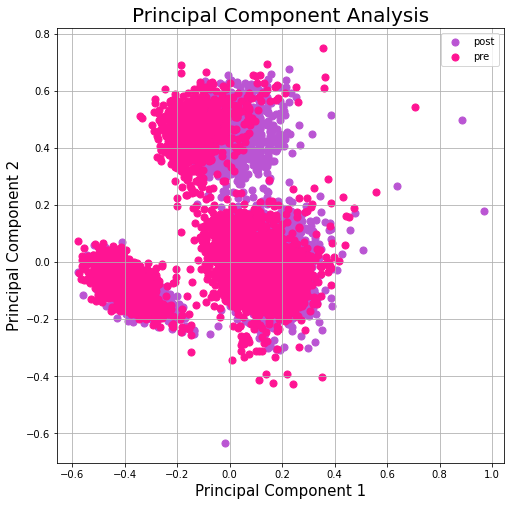

In [63]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Principal Component Analysis', fontsize = 20)
targets = ['post', 'pre']
colors = ['mediumorchid', 'deeppink']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['cocaine status'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               , final_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [61]:
pca.explained_variance_ratio_


array([0.41514774, 0.23475438])

In [0]:
multisite_df = pd.read_csv('drive/My Drive/Projects/pilot_mouse_connectivity/cocaine_two_mice/Spectrogram_data/updated_data/multisite_averaged_data.csv')

In [0]:
multisite_df.drop("Unnamed: 0", axis=1,inplace=True)


In [0]:
multisite_df.fillna(multisite_df.mean(), inplace=True)

In [0]:
sub1_df=multisite_df.loc[0:1799, ]

In [101]:
sub1_df.tail()

,PFC gamma,VTA gamma,BLA gamma,NAc gamma,PFC beta,VTA beta,BLA beta,NAc beta,PFC theta,VTA theta,BLA theta,NAc theta,reference wires,mouse id,Time (s),Speed (cm/s),cocaine status,recording
1795,-56.865715,-57.942726,-52.129210,-53.307285,-49.976629,-50.508154,-44.014494,-46.660643,-38.009357,-40.977594,-35.588515,-36.545130,-45.135876,1,1795,4.658641,post,1
1796,-56.473973,-58.849609,-52.928476,-52.319462,-49.798711,-51.120191,-43.926163,-48.284506,-37.293854,-42.177768,-33.858847,-37.812734,-45.216104,1,1796,5.963985,post,1
1797,-56.605047,-57.997710,-54.303418,-53.893559,-48.505382,-51.477111,-46.106859,-47.793434,-40.364863,-36.448517,-34.211939,-40.414986,-48.380461,1,1797,7.986120,post,1
1798,-56.040445,-58.415036,-53.152960,-53.526476,-51.928621,-50.732911,-44.187890,-46.059507,-40.522954,-38.516281,-35.948192,-38.818920,-46.030858,1,1798,9.202635,post,1
1799,-56.522924,-59.501544,-53.045512,-53.967195,-50.221742,-51.942138,-45.947853,-44.495006,-40.765705,-40.219637,-36.467200,-38.934519,-45.924036,1,1799,9.357146,post,1


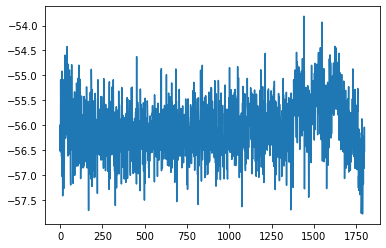

In [102]:
fig, ax = plt.subplots()
ax.plot(sub1_df['Time (s)'], sub1_df['PFC gamma'])


In [0]:
for name, group in groups:
	years[name.year] = group.values
years.plot(subplots=True, legend=False)
pyplot.show()